In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ruma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Model Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 200

In [4]:
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) 
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 
n_samples = train_X.shape[0] 

In [5]:
# Test Data 
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]) 
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]) 
  

In [6]:
# Set placeholders for feature and target vectors 
X = tf.placeholder(tf.float32) 
y = tf.placeholder(tf.float32) 

In [7]:
# Set model weights and bias 
W = tf.Variable(np.random.randn(), name="weight") 
b = tf.Variable(np.random.randn(), name="bias") 

In [8]:
# Construct a linear model 
linear_model = W*X + b 

In [9]:
# Mean squared error 
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples) 

In [10]:
# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  

In [11]:
# Initializing the variables 
init = tf.global_variables_initializer() 

Epoch:   200 	 Cost:   0.07714 	 W:0.2598 	 b:0.7407
Epoch:   400 	 Cost:   0.07706 	 W:0.2581 	 b:0.7532
Epoch:   600 	 Cost:   0.07701 	 W:0.2567 	 b: 0.763
Epoch:   800 	 Cost:   0.07698 	 W:0.2556 	 b:0.7708
Epoch:  1000 	 Cost:   0.07696 	 W:0.2547 	 b:0.7768
Epoch:  1200 	 Cost:   0.07695 	 W:0.2541 	 b:0.7815
Epoch:  1400 	 Cost:   0.07694 	 W:0.2535 	 b:0.7853
Epoch:  1600 	 Cost:   0.07694 	 W:0.2531 	 b:0.7882
Epoch:  1800 	 Cost:   0.07693 	 W:0.2528 	 b:0.7905
Epoch:  2000 	 Cost:   0.07693 	 W:0.2526 	 b:0.7923
Optimization Finished!
Final training cost: 0.07693148 W: 0.25255594 b: 0.79227173 



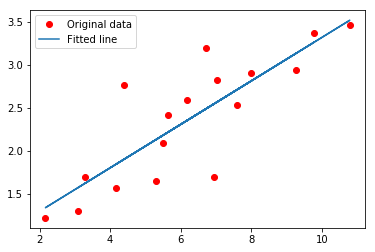

Final testing cost: 0.0781035
Absolute mean square loss difference: 0.001172021


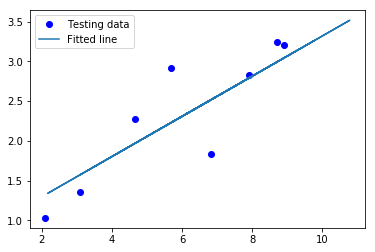

In [28]:
# Launch the graph 
with tf.Session() as sess: 
    # Load initialized variables in current session 
    sess.run(init) 
  
    # Fit all training data 
    for epoch in range(training_epochs): 
  
        # perform gradient descent step 
        sess.run(optimizer, feed_dict={X: train_X, y: train_y}) 
          
        # Display logs per epoch step 
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}". 
                  format(epoch+1, c, sess.run(W), sess.run(b))) 
              
    # Print final parameter values 
    print("Optimization Finished!") 
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:",  
          sess.run(b), '\n') 
      
    # Graphic display 
    plt.plot(train_X, train_y, 'ro', label='Original data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 
  
    # Testing the model 
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y}) 
      
    print("Final testing cost:", testing_cost) 
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost)) 
  
    # Display fitted line on test data 
    plt.plot(test_X, test_y, 'bo', label='Testing data') 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
    plt.legend() 
    plt.show() 
